<a href="https://colab.research.google.com/github/sidraalyousef/dsa210/blob/main/dsaproject_syria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
from os.path import join
from scipy.stats import pearsonr
from scipy.stats import ks_2samp
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# loading syria data from drive
file_path = '/content/drive/My Drive/syria_data.xlsx'
data = pd.read_excel(file_path)


# display first few rows to verify
# print("Data Preview:\n", data.head())
#print("info: \n", data.info())

Mounted at /content/drive


##Part 0: Data Cleaning:

In [ ]:
# data cleaning:
numeric_columns = ['inflation', 'exchangerate', 'unemploymentrate', 'povertyrate']
for col in numeric_columns:
  data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna()

#Part 1: Exploring the data:

##Attribute Types:
- year: Numerical (Discrete)
- inflation: Numerical (Continuous)
- exchangerate: Numerical (Continuous)
- unemploymentrate: Numerical (Continuous)
- povertyrate: Numerical (Continuous)
- targetedsanctions: Categorical (Binary)
- comprehensivesanctions: Categorical (Binary)

##Attribute Units:
1. inflation: percentage
2. exchange rate: USD to Syrian Pounds
3. unemployment rate: percentage
4. poverty rate: percentage

In [ ]:
#1. EDA

# data shape
print("Data Shape:", data.shape)

# data types
#print("Data Types:\n", data.dtypes)

#summary stats for each attribute
print("\nSummary Statistics for Numerical Attributes: \n")

for col in numeric_columns:
  print("Summary Statistics for", col)
  print(data[col].describe())
  print("\n")

Data Shape: (25, 7)

Summary Statistics for Numerical Attributes: 

Summary Statistics for inflation
count     25.000000
mean      29.842400
std       37.927595
min       -3.850000
25%        4.400000
50%       10.930000
75%       40.030000
max      116.170000
Name: inflation, dtype: float64


Summary Statistics for exchangerate
count       25.000000
mean      1126.514553
std       2966.772764
min         11.225000
25%         11.225000
50%         64.580833
75%        460.275833
max      13100.000000
Name: exchangerate, dtype: float64


Summary Statistics for unemploymentrate
count    25.000000
mean     22.634000
std       8.013938
min      11.660000
25%      15.430000
50%      27.850000
75%      30.100000
max      32.460000
Name: unemploymentrate, dtype: float64


Summary Statistics for povertyrate
count    25.000000
mean     44.683600
std      25.855802
min      12.000000
25%      27.800000
50%      33.000000
75%      63.000000
max      90.000000
Name: povertyrate, dtype: float64




#Part 2: Visualizations:
a.  inflation, unemployment rate, poverty rate, from 2000 to 2024 (line chart)

b.  exchange rate: before the war (2000-2010), after the war (2011-2024)  (area charts)

c.  inflation vs. poverty rate (scatterplot)

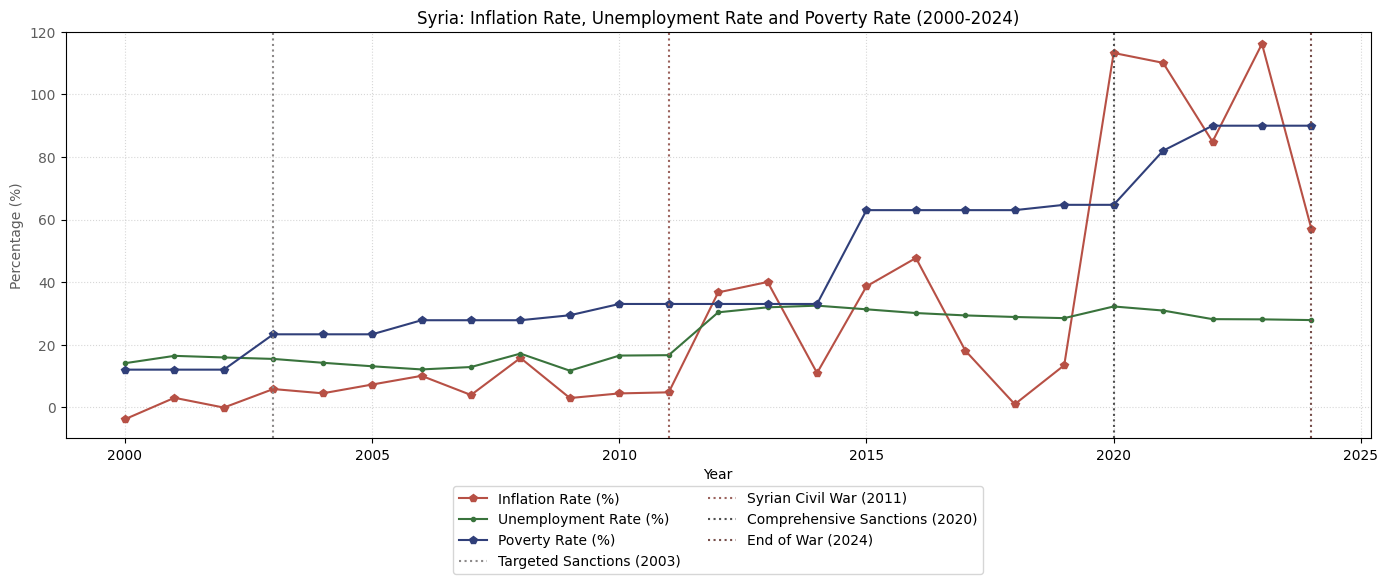

In [ ]:
# 2. Visuliztions
# 2.A. line chart for inflation, unemploymentrate, povertyrate (percentages)
# min: -3.850000, max: 116.170000
plt.figure(figsize=(14, 6))

# one y-axis for inflation, unemploymentrate, povertyrate
ax = plt.gca()
ax.plot(data['year'], data['inflation'], color='#b75045', label='Inflation Rate (%)', marker='p')
ax.plot(data['year'], data['unemploymentrate'], color='#39733c', label='Unemployment Rate (%)', marker='.')
ax.plot(data['year'], data['povertyrate'], color='#303f79', label='Poverty Rate (%)', marker='p')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage (%)', color='#5d5d5d')
ax.tick_params(axis='y', labelcolor='#5d5d5d')

# setting y-axis range to accommodate all data [min:max]
ax.set_ylim(-10, 120)


# adding lines for sanction events, and syrian civil war
plt.axvline(x=2003, color='#8c8989', linestyle='dotted', label='Targeted Sanctions (2003)')
plt.axvline(x=2011, color='#9b635d', linestyle='dotted', label='Syrian Civil War (2011)')
plt.axvline(x=2020, color='#4f4f4f', linestyle='dotted', label='Comprehensive Sanctions (2020)')
plt.axvline(x=2024, color='#764d49', linestyle='dotted', label='End of War (2024)')


# adding title and legend
plt.title('Syria: Inflation Rate, Unemployment Rate and Poverty Rate (2000-2024)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

plt.grid(True, linestyle='dotted', alpha=0.5)
plt.tight_layout()

plt.show()

plt.savefig('syria_inflation_pr_ur_plot.png', dpi=300, bbox_inches='tight')
plt.close()

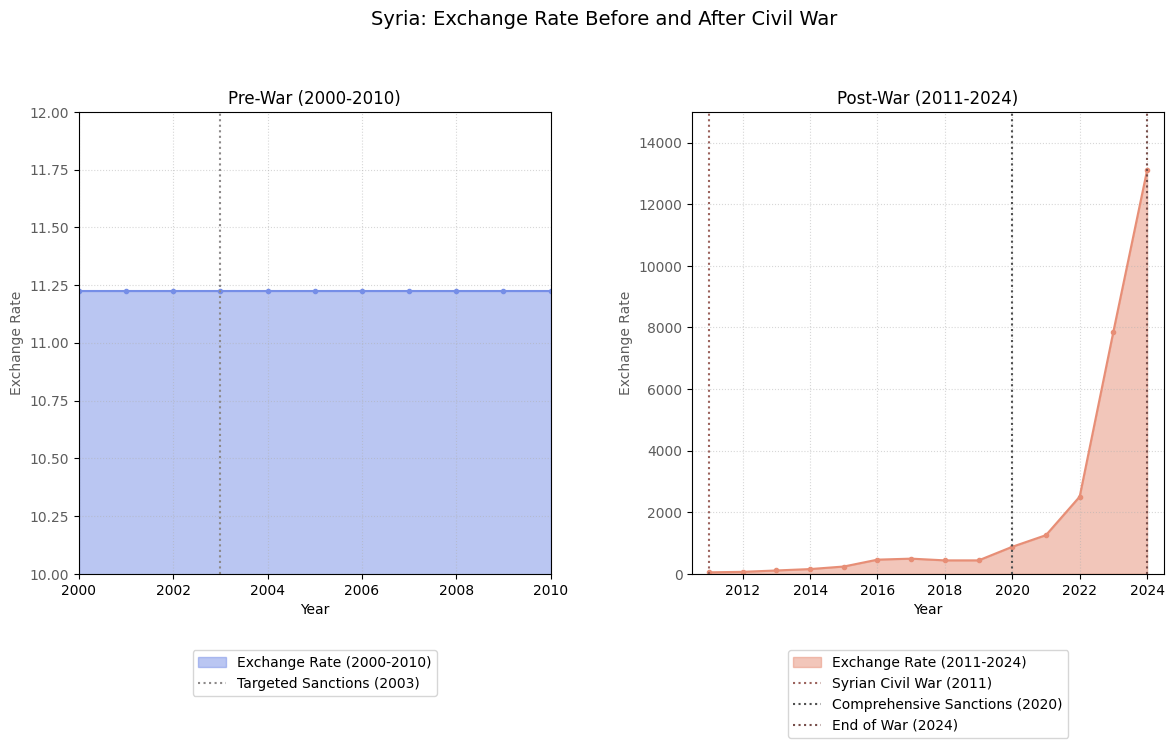

In [ ]:
# 2.B. area charts for exchange rate
# splitting data into pre-war (2000-2010) and post-war (2011-2024)  (not clear in a single visualization)
pre_war = data[data['year'] <= 2010]
post_war = data[data['year'] >= 2011]

# creating the figure with two subplots next to eachother
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# pre-war area chart (2000-2010), stable at 11.225
ax1.fill_between(pre_war['year'], pre_war['exchangerate'], color='#768ee7', alpha=0.5, label='Exchange Rate (2000-2010)')
ax1.plot(pre_war['year'], pre_war['exchangerate'], color='#768ee7', marker='.')
ax1.set_xlabel('Year')
ax1.set_ylabel('Exchange Rate', color='#5d5d5d')
ax1.tick_params(axis='y', labelcolor='#5d5d5d')
ax1.set_ylim(10, 12)
ax1.set_xlim(2000, 2010)
ax1.axvline(x=2003, color='#8c8989', linestyle='dotted', label='Targeted Sanctions (2003)')
ax1.set_title('Pre-War (2000-2010)')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1)
ax1.grid(True, linestyle='dotted', alpha=0.5)

# post-war area chart (2011-2024)
ax2.fill_between(post_war['year'], post_war['exchangerate'], color='#e78e76', alpha=0.5, label='Exchange Rate (2011-2024)')
ax2.plot(post_war['year'], post_war['exchangerate'], color='#e78e76', marker='.')
ax2.set_xlabel('Year')
ax2.set_ylabel('Exchange Rate', color='#5d5d5d')
ax2.tick_params(axis='y', labelcolor='#5d5d5d')
ax2.set_ylim(0, 15000)  # max: 13100, min: 48
ax2.set_xlim(2010.5, 2024.5)
ax2.axvline(x=2011, color='#9b635d', linestyle='dotted', label='Syrian Civil War (2011)')
ax2.axvline(x=2020, color='#4f4f4f', linestyle='dotted', label='Comprehensive Sanctions (2020)')
ax2.axvline(x=2024, color='#764d49', linestyle='dotted', label='End of War (2024)')
ax2.set_title('Post-War (2011-2024)')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1)
ax2.grid(True, linestyle='dotted', alpha=0.5)

# adding main title
fig.suptitle('Syria: Exchange Rate Before and After Civil War', fontsize=14, y=1.05)

plt.subplots_adjust(wspace=0.3)

#plt.tight_layout()

plt.show()

plt.savefig('syria_exchange_rate_pre_post_war_area_plot.png', dpi=300, bbox_inches='tight')
plt.close()

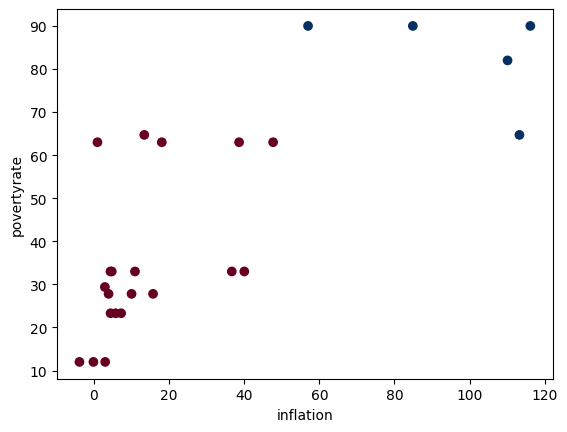

In [ ]:
# 2. C. scatterplot for inflation vs. poverty rate
plt.scatter('inflation', 'povertyrate', c= 'comprehensivesanctions', data=data, cmap='RdBu')

plt.xlabel('inflation')
plt.ylabel('povertyrate')

plt.show()
plt.savefig('syria_inflation_povertyrate_scatterplot.png', dpi=300, bbox_inches='tight')
plt.close()

#Part 3: Making Correlation Matrix

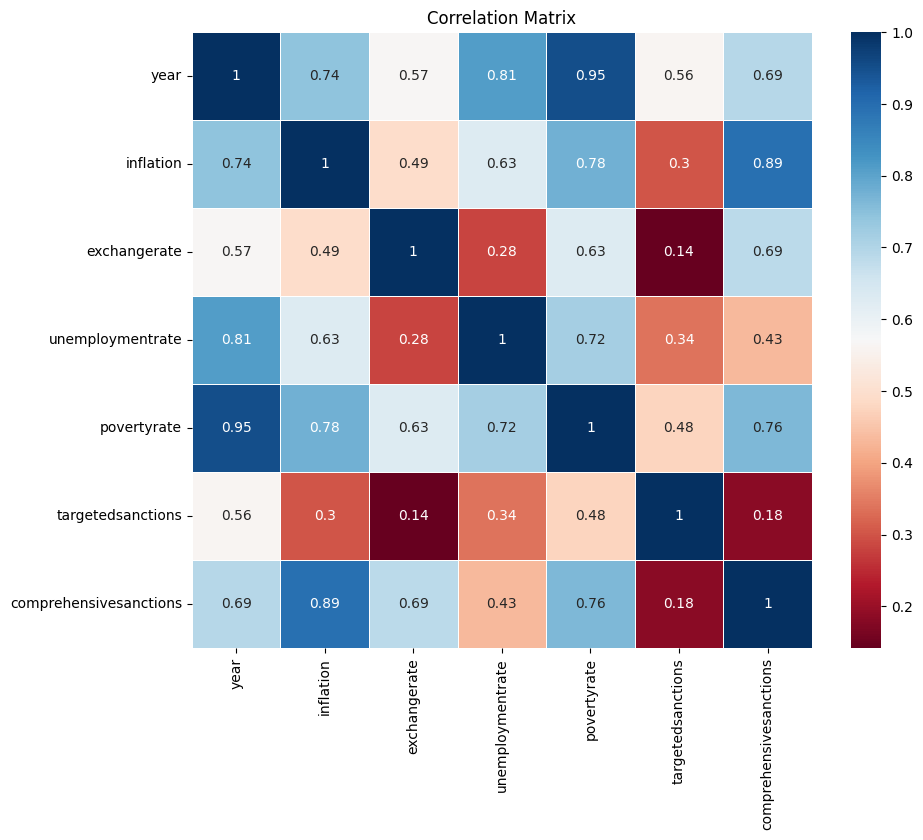

In [ ]:
# 3. correlation Analysis
# correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Part 4: Hypothesis Testing
A: Effect of Comprehensive sanctions

B: Effect of Targeted sanctions

C: Relationships between Attributes

##Summary for Hypothesis Testing Part A: Effect of Comprehensive Sanctions on Attributes:
1. Inflation: significant relationship
2. Exchange Rate: significant relationship
3. Unemployment Rate: significant relationship
4. Poverty Rate: significant relationship

In [ ]:
# 4.Hypothesis Testing:
# 4. A: how comprehensive sanctions affect attributes
# 4.A.1 Pearson correlation between comprehensive sanctions and inflation
correlation, p_value = pearsonr(data['comprehensivesanctions'], data['inflation'])
print("Correlation:", correlation)
print("P-Value:", p_value)
if p_value < 0.05:
    print("Significant relationship: Reject H₀ (Comprehensive sanctions affect inflation).")
else:
    print("No significant relationship: Fail to reject H₀ (Comprehensive sanctions do not affect inflation).")

Correlation: 0.8939622281784657
P-Value: 1.7511979154568426e-09
Significant relationship: Reject H₀ (Comprehensive sanctions affect inflation).


In [ ]:
# 4.A.2 Pearson correlation between comprehensive sanctions and exchange rate
correlation, p_value = pearsonr(data['comprehensivesanctions'], data['exchangerate'])
print("Correlation:", correlation)
print("P-Value:", p_value)
if p_value < 0.05:
    print("Significant relationship: Reject H₀ (Comprehensive sanctions affect exchange rate).")
else:
    print("No significant relationship: Fail to reject H₀ (Comprehensive sanctions do not affect exchange rate).")

Correlation: 0.6869375627613741
P-Value: 0.00014896235577361973
Significant relationship: Reject H₀ (Comprehensive sanctions affect exchange rate).


In [ ]:
# 4.A.3 Pearson correlation between comprehensive sanctions and unemployment rate
correlation, p_value = pearsonr(data['comprehensivesanctions'], data['unemploymentrate'])
print("Correlation:", correlation)
print("P-Value:", p_value)
if p_value < 0.05:
    print("Significant relationship: Reject H₀ (Comprehensive sanctions affect unemployment rate).")
else:
    print("No significant relationship: Fail to reject H₀ (Comprehensive sanctions do not affect unemployment rate).")

Correlation: 0.4331367332459321
P-Value: 0.030554687082365473
Significant relationship: Reject H₀ (Comprehensive sanctions affect unemployment rate).


In [ ]:
# 4.A.4 Pearson correlation between comprehensive sanctions and poverty rate
correlation, p_value = pearsonr(data['comprehensivesanctions'], data['povertyrate'])
print("Correlation:", correlation)
print("P-Value:", p_value)
if p_value < 0.05:
    print("Significant relationship: Reject H₀ (comprehensivesanctions affect poverty rate).")
else:
    print("No significant relationship: Fail to reject H₀ (comprehensivesanctions do not affect poverty rate).")

Correlation: 0.7629530060461325
P-Value: 9.214748001667579e-06
Significant relationship: Reject H₀ (comprehensivesanctions affect poverty rate).


##Summary for Hypothesis Testing Part B: Effect of Targeted Sanctions on Attributes:
1. Inflation: no significant relationship
2. Exchange Rate: no significant relationship
3. Unemployment Rate: no significant relationship
4. Poverty Rate: significant relationship

In [ ]:
# 4.B How targeted sanctions affect attributes
# 4.B.1: Pearson correlation between targeted sanctions and inflation
correlation, p_value = pearsonr(data['targetedsanctions'], data['inflation'])
print("Correlation:", correlation)
print("P-Value:", p_value)
if p_value < 0.05:
    print("Significant relationship: Reject H₀ (Targeted sanctions affect inflation).")
else:
    print("No significant relationship: Fail to reject H₀ (Targeted sanctions do not affect inflation).")

Correlation: 0.29979214145110344
P-Value: 0.14540556382368863
No significant relationship: Fail to reject H₀ (Targeted sanctions do not affect inflation).


In [ ]:
# 4.B.2 Pearson correlation between targeted sanctions and exchange rate
correlation, p_value = pearsonr(data['targetedsanctions'], data['exchangerate'])
print("Correlation:", correlation)
print("P-Value:", p_value)
if p_value < 0.05:
    print("Significant relationship: Reject H₀ (Targeted sanctions affect exchange rate).")
else:
    print("No significant relationship: Fail to reject H₀ (Targeted sanctions do not affect exchange rate).")

Correlation: 0.14168276419506232
P-Value: 0.4993160847850476
No significant relationship: Fail to reject H₀ (Targeted sanctions do not affect exchange rate).


In [ ]:
# 4.B.3 Pearson correlation between targeted sanctions and unemployment rate
correlation, p_value = pearsonr(data['targetedsanctions'], data['unemploymentrate'])
print("Correlation:", correlation)
print("P-Value:", p_value)
if p_value < 0.05:
    print("Significant relationship: Reject H₀ (Targeted sanctions affect unemployment rate).")
else:
    print("No significant relationship: Fail to reject H₀ (Targeted sanctions do not affect unemployment rate).")

Correlation: 0.3375443074343739
P-Value: 0.09891062491931686
No significant relationship: Fail to reject H₀ (Targeted sanctions do not affect unemployment rate).


In [ ]:
# 4.B.4 Pearson correlation between targeted sanctions and poverty rate
correlation, p_value = pearsonr(data['targetedsanctions'], data['povertyrate'])
print("Correlation:", correlation)
print("P-Value:", p_value)
if p_value < 0.05:
    print("Significant relationship: Reject H₀ (Targeted sanctions affect poverty rate).")
else:
    print("No significant relationship: Fail to reject H₀ (Targeted sanctions do not affect poverty rate).")

Correlation: 0.47641513651488415
P-Value: 0.01605750060762587
Significant relationship: Reject H₀ (Targeted sanctions affect poverty rate).


##Summary of Hypothesis Testing Part C: Relationships between Attributes
1. Inflation and poverty rate: significant relationship
2. Inflation and unemployment rate: significant relationship

In [ ]:
# Hypothesis Testing C: Extra correlations
# 4.C.1 Pearson correlation between inflation and poverty rate
correlation, p_value = pearsonr(data['inflation'], data['povertyrate'])
print("Correlation:", correlation)
print("P-Value:", p_value)
if p_value < 0.05:
    print("Significant relationship: Reject H₀ (Inflation affects Poverty Rate).")
else:
    print("No significant relationship: Fail to reject H₀ (Inflation do not affect poverty rate).")

Correlation: 0.7754198190555313
P-Value: 5.292522366922292e-06
Significant relationship: Reject H₀ (Inflation affects Poverty Rate).


In [ ]:
# 4.C.2 Pearson correlation between inflation and unemployment rate
correlation, p_value = pearsonr(data['inflation'], data['unemploymentrate'])
print("Correlation:", correlation)
print("P-Value:", p_value)
if p_value < 0.05:
    print("Significant relationship: Reject H₀ (Inflation affects unemployment Rate).")
else:
    print("No significant relationship: Fail to reject H₀ (Inflation do not affect unemployment rate).")

Correlation: 0.6303474997402968
P-Value: 0.0007315132049107585
Significant relationship: Reject H₀ (Inflation affects unemployment Rate).


#Part 5: Feature Enginerring:


R² Score: 0.7822
RMSE: 0.1317

Regression Coefficients:
                        Feature   Coefficient
0              exchangerate_log -1.460273e-01
1              unemploymentrate  1.071861e-01
2                   povertyrate  8.850075e-02
3             targetedsanctions  1.124101e-15
4  post_comprehensive_sanctions  2.523337e-01
5                inflation_lag1 -1.033702e-02
6             exchangerate_lag1 -1.913457e-02


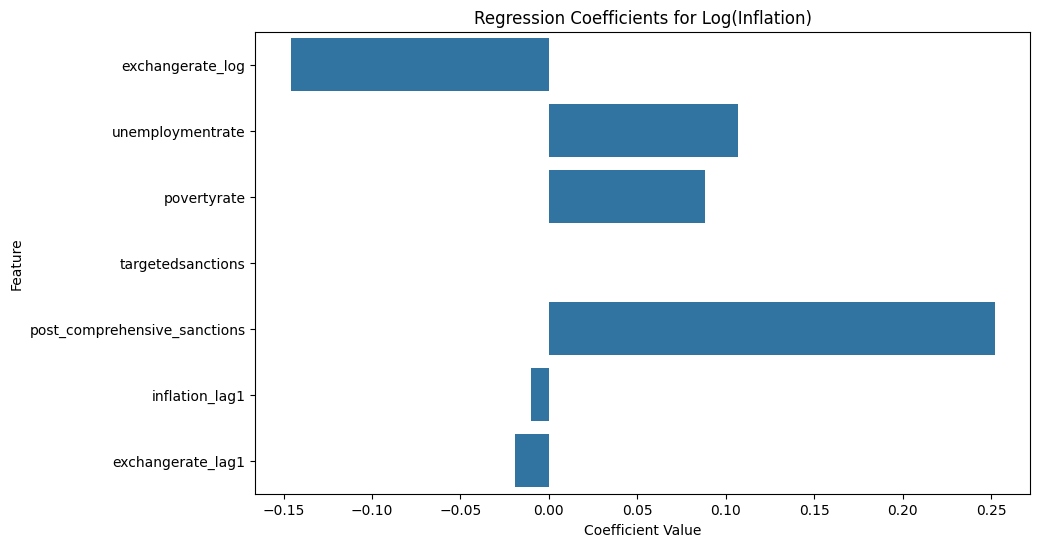

In [ ]:
# 5. Feature Engineering
# A. log-transform inflation rate (for heteroskedasticity)
data['inflation_log'] = np.log(data['inflation'] + 100)  # add const for neg vals

# B. Log-transform exchange rate
data['exchangerate_log'] = np.log(data['exchangerate'])

# C. make lagged variables for inflation and exchange rate
data['inflation_lag1'] = data['inflation'].shift(1)
data['exchangerate_lag1'] = data['exchangerate'].shift(1)

# D.make binary indicator for before and after comprehensive sanctions (2020)
data['post_comprehensive_sanctions'] = data['comprehensivesanctions']

# drop rows with NaN values
data = data.dropna()

#prepare features and target
features = ['exchangerate_log', 'unemploymentrate', 'povertyrate', 'targetedsanctions', 'post_comprehensive_sanctions', 'inflation_lag1', 'exchangerate_lag1']
X = data[features]
y = data['inflation_log']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale features using Standardization (Z-score)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# fit multiple linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# prediction and evaluation
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R² Score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')

# interpret coeffs
coef_data = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print("\nRegression Coefficients:")
print(coef_data)

# make plot for regression coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_data)
plt.title('Regression Coefficients for Log(Inflation)')
plt.xlabel('Coefficient Value')
plt.savefig('syria_regression.png', dpi=300, bbox_inches='tight')
#plt.show()

# Part 6: Machine Learning

K-S Test: Statistic=1.000, p-value=0.000


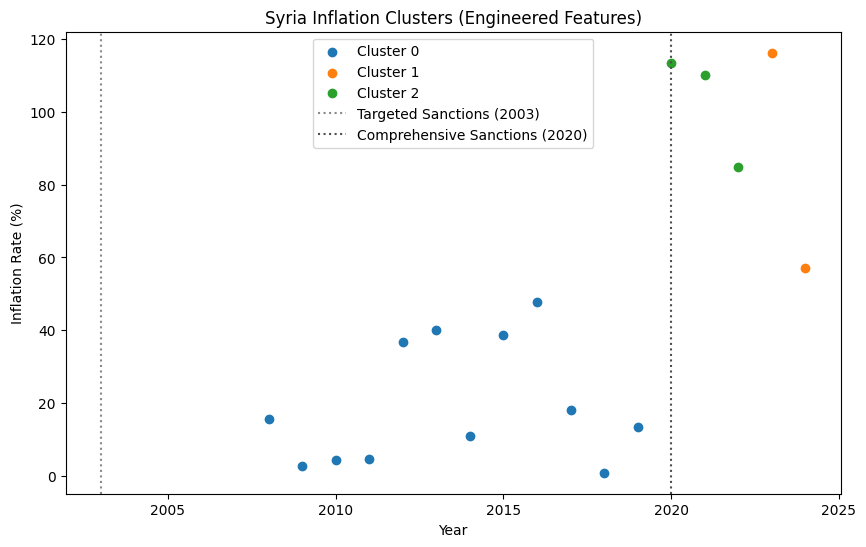

In [46]:
#K-S Test for data shift
pre_2020 = data[data['year'] < 2020]['inflation']
post_2020 = data[data['year'] >= 2020]['inflation']
ks_stat, p_value = ks_2samp(pre_2020, post_2020)
print(f'K-S Test: Statistic={ks_stat:.3f}, p-value={p_value:.3f}')

# K-Means clustering
X_cluster = data[['inflation', 'povertyrate', 'exchangerate']]
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_cluster)
plt.figure(figsize=(10, 6))
for cluster in range(3):
  subset = data[data['cluster'] == cluster]
  plt.scatter(subset['year'], subset['inflation'], label=f'Cluster {cluster}')

plt.axvline(x=2003, color='#8c8989', linestyle='dotted', label='Targeted Sanctions (2003)')
plt.axvline(x=2020, color='#4f4f4f', linestyle='dotted', label='Comprehensive Sanctions (2020)')


plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.title('Syria Inflation Clusters (Engineered Features)')
plt.legend()
plt.savefig('syria_inflation_clusters_engineered_features.png')
plt.show()
plt.close()